### 2021 Spring "EE479: Scientific Computing & Data"
#### Yong-Hoon Kim, KAIST Electrical Engineering

#### Linge & Langtagen Ch.4.3.4: Semi-implicit Euler or Euler-Cromer
#### 2021.03.30 Revised from <osc_EC.py>

To solve (Following the standard convention, the order of equations have been changed):
$$(4.53): v'=-\omega^2 u,$$
$$(4.54): u'=v. $$

Algorithm:
$$(4.55): v^{n+1}=v^{n}-\Delta t \, \omega^2 \, u^n$$  
$$(4.56): u^{n+1}=u^{n}+\Delta t \, v^{n+1}$$

P  = 3.1415927
dt = 0.1570796
T  = 31.4159265
N_t = 200


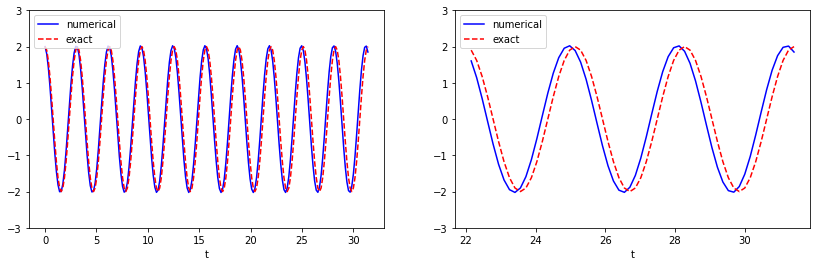

1.8499330066871469 -1.0463257850230732


In [3]:
#ode_EC.py
from numpy import zeros, linspace, pi, cos
import matplotlib.pyplot as plt
 
omega = 2
P = 2*pi/omega
dt = P/20     # P/40, P/160, P/2000 for comparison
T = 10*P
N_t = int(round(T/dt))
t = linspace(0, N_t*dt, N_t+1)
print('P  = %.7f' % P)
print('dt = %.7f' % dt)
print('T  = %.7f' % T)
print('N_t =', N_t)
 
u = zeros(N_t+1)
v = zeros(N_t+1)
 
# Initial condition
X_0 = 2
u[0] = X_0
v[0] = 0
  
# Step equations forward in time
for n in range(N_t):
    v[n+1] = v[n] - dt*omega**2*u[n]
    u[n+1] = u[n] + dt*v[n+1]
  
fig = plt.figure(figsize=[14,4])
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(t, u, 'b-', label='numerical')
ax1.plot(t, X_0*cos(omega*t), 'r--', label='exact')
ax1.set_ylim(-3,3)
ax1.set_xlabel('t')
ax1.legend(loc='upper left')

# Plot the last three periods to illustrate the accuracy in long time simulations
N3l = int(round(3*P/dt))  # No of intervals to be plotted
ax2.plot(t[-N3l:], u[-N3l:], 'b-', label='numerical')
ax2.plot(t[-N3l:], X_0*cos(omega*t)[-N3l:], 'r--', label='exact')
plt.ylim(-3,3)
plt.xlabel('t')
plt.legend(loc='upper left')

plt.show()
#plt.savefig('tmp.pdf'); plt.savefig('tmp.png')

print('%.16f %.16f' % (u[-1], v[-1]))

To summarize, using a forward difference for the first equation and a backward difference for the second equation results in a much better method than just using forward differences in both equations.